In [1]:
from scipy import stats as st
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns

# Procesamiento de los datos

In [2]:
df = pd.read_csv('/datasets/games.csv')

# Renombro las columnas en minúsculas
df.columns = df.columns.str.lower()

# Convierto los datos al tipo necesario
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float) 

# 3. Opcional: revisar valores nulos por columna
print("Valores nulos por columna:\n", df.isna().sum())



Valores nulos por columna:
 name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


## ------------ Tratamiento de nulos --------------

In [3]:
# Eliminar filas sin name, genre o year_of_release
df = df.dropna(subset=['name', 'genre', 'year_of_release'])
# Imputar user_score con la media
df['user_score'] = df['user_score'].fillna(df['user_score'].mean())

# Imputar critic_score con la media
df['critic_score'] = df['critic_score'].fillna(df['critic_score'].mean())

# Imputar rating con la moda (valor más frecuente)
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

### Explicación del tratamiento de valores ausentes

Se encontraron valores ausentes en las columnas name, year of release, genre, critic score, user_score y rating. Para cada tipo de datos ausentes se tomó una decisión priorizando el cuidado de los datos y atendiendo a un criterio de adecuación para el posterior análisis de datos.

1. Para la columna 'name': Se decidió eliminar estos valores debido a que no se puede analizar un juego sin nombre. Un posible motivo de ausencia sería un error de carga.
2. Para la columna 'year_of_release': Se decidió eliminar estos valores ausentes puesto que el Año es clave para análisis temporal. Un posible motivo de ausencia sería que el juego aún no ha sido lanzado o falta el registro.
3. Para la columna 'genre': Se decidió eliminar los valores ausentes puesto que el género es una categoría esencial para análisis de tendencias. Adicionalmente, un posible motivo de ausencia sería que hay un registro incompleto.
4. Para la columna 'critic_score': Se decidió reemplazar por la media porque permiten completar el dataset sin eliminar registros útiles. Un posible motivo de ausencia sería que no fue evaluado por los críticos.
5. Para la columna 'user_score': Se decidió reemplazar por la media porque permiten completar el dataset sin eliminar registros útiles. Un posible motivo de ausencia sería que no fue evaluado por los usuarios o un error de carga.
6. Para la columna 'rating': Se rellenó rating con la moda porque es una categoría y no se puede promediar. Un posible motivo de ausencia sería que los juegos no cuentan con clasicación ESRB (indie o internacional)

In [4]:
# Cálculo de ventas totales
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Mostrar resumen final
print("Valores nulos después del tratamiento:\n", df.isna().sum())
print(df.head())

Valores nulos después del tratamiento:
 name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45     76.000000     8.00000      E   
1      3.58      6.81         0.77     68.994363     7.12633      

 # Análisis de los datos

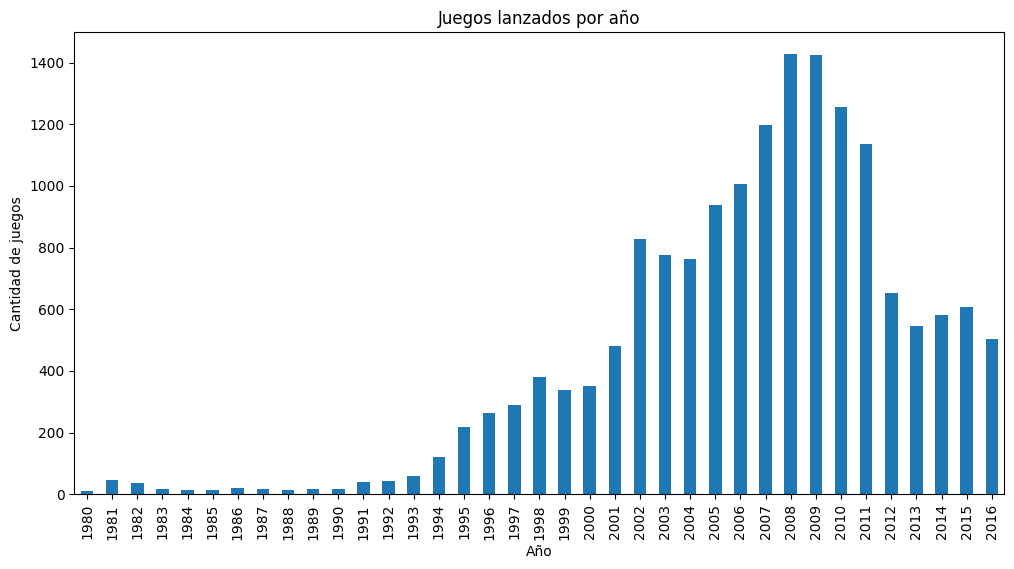

In [5]:
# Juegos lanzados por año
games_per_year = df['year_of_release'].value_counts().sort_index()

plt.figure(figsize=(12,6))
games_per_year.plot(kind='bar')
plt.title('Juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de juegos')
plt.show()



<div class="alert alert-block alert-success">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
Muy buena visualización del número de lanzamientos por año. El gráfico está claro, bien rotulado y permite identificar fácilmente la tendencia temporal. Además, la observación escrita demuestra capacidad de análisis.
</div>


Observaciones:

- El resultado indica una curva de incremento de lanzamientos entre el año 2001 y 2011, con un pico descendiente desde 2012 hasta 2016. Esto parece ir acorde a la fama adquirida con el paso del tiempo de los videojuegos y la comunidad en crecimiento de gamers.

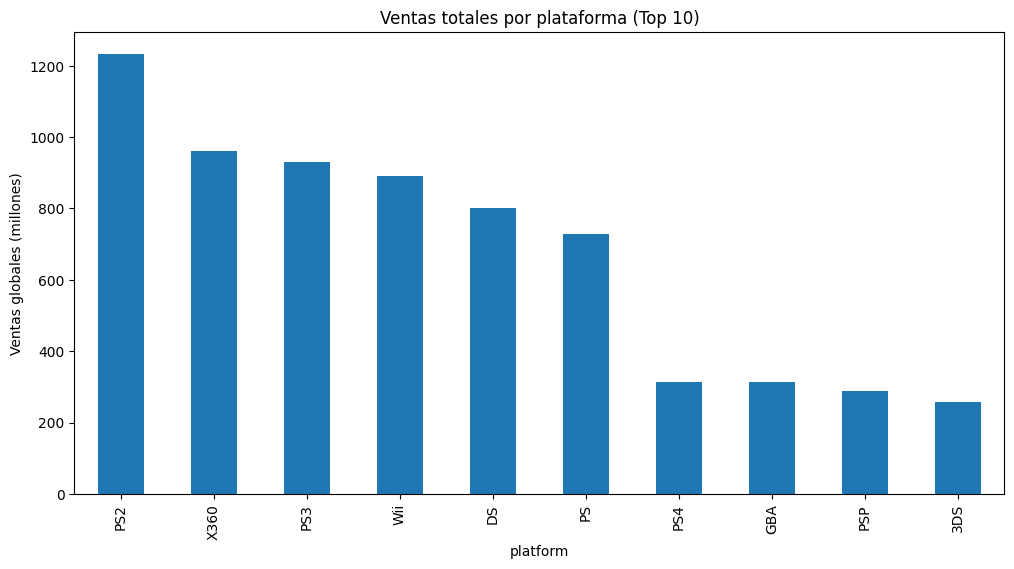

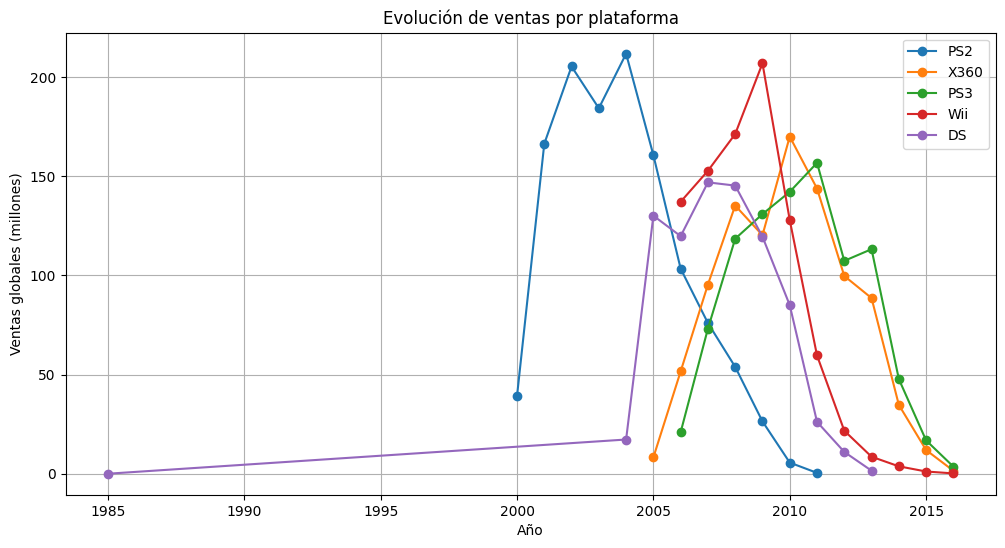

In [6]:
# Ventas totales por plataforma
sales_by_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Top 10 plataformas
top_platforms = sales_by_platform.head(10).index.tolist()

plt.figure(figsize=(12,6))
sales_by_platform.head(10).plot(kind='bar')
plt.title('Ventas totales por plataforma (Top 10)')
plt.ylabel('Ventas globales (millones)')
plt.show()

# Evolución temporal de las plataformas más populares
plt.figure(figsize=(12,6))
for platform in top_platforms[:5]:  # Tomamos las 5 principales para claridad
    platform_data = df[df['platform'] == platform]
    yearly_sales = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, label=platform, marker='o')
    
plt.title('Evolución de ventas por plataforma')
plt.xlabel('Año')
plt.ylabel('Ventas globales (millones)')
plt.legend()
plt.grid()
plt.show()


El gráfico que ilustra la evolución de las ventas de las distintas plataformas indica un comportamiento estadístico semi-uniforme. La PS2 fue la plataforma de gaming más popular desde el 2000 hasta el 2005, siendo solo igualado por el Wii en el año 2009. El resto de plataformas tuvieron auge de popularidad, pero no como las dos anteriores. La que sigue en popularidad fue el X360, que tuvo un crecimiento uniforme desde 2005 hasta 2010.

Se puede informar que las plataformas pierden popularidad en un aproximado entre 5 y 7 años.

In [8]:
# Para predecir 2017, debemos considerar datos recientes pero con suficiente historia
# Las plataformas actuales en 2017 son PS4, XOne, 3DS, WiiU, PC
# Tomaremos datos desde 2012 en adelante para nuestro modelo
df_recent = df[df['year_of_release'] >= 2012].copy()

print(f"Juegos en el periodo reciente: {len(df_recent)}")

Juegos en el periodo reciente: 2886


Trabajaremos con los datos de 2005 en adelante.

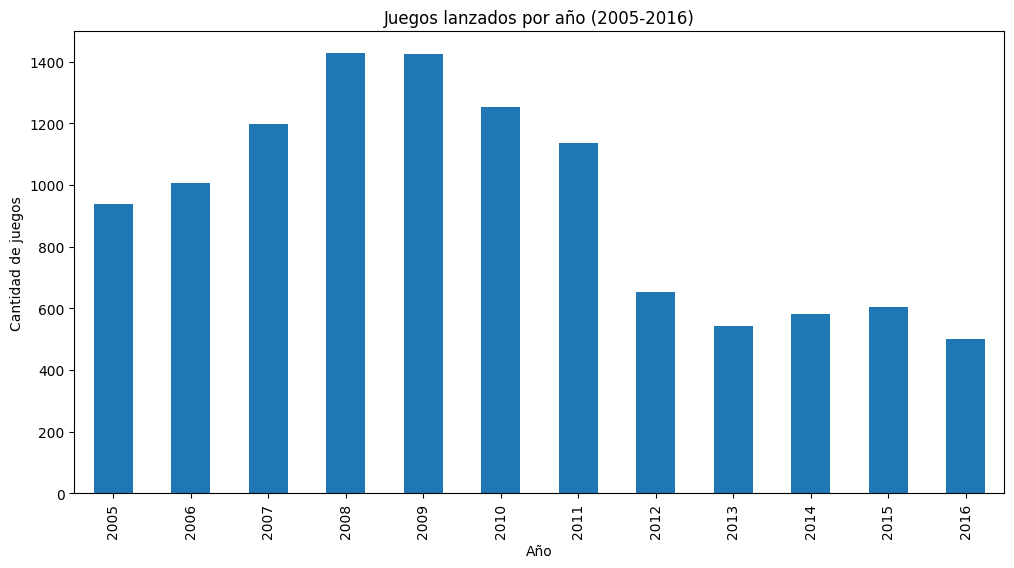

In [10]:
# Filtrar datos para el período 2005-2016
df_period = df[(df['year_of_release'] >= 2005) & (df['year_of_release'] <= 2016)].copy()

# Verificar distribución por año
plt.figure(figsize=(12,6))
df_period['year_of_release'].value_counts().sort_index().plot(kind='bar')
plt.title('Juegos lanzados por año (2005-2016)')
plt.xlabel('Año')
plt.ylabel('Cantidad de juegos')
plt.show()

In [12]:
# PLATAFORMAS LÍDERES EN VENTAS

# Dividir en dos períodos para analizar tendencias
df_early = df_period[df_period['year_of_release'].between(2005, 2010)]
df_late = df_period[df_period['year_of_release'].between(2011, 2016)]

# Ventas por plataforma en cada período
early_sales = df_early.groupby('platform')['total_sales'].sum()
late_sales = df_late.groupby('platform')['total_sales'].sum()

# Crecimiento/declive
growth = pd.DataFrame({
    'Early': early_sales,
    'Late': late_sales
}).fillna(0)

growth['Change'] = (growth['Late'] - growth['Early']) / growth['Early']
growth['Abs_Change'] = growth['Late'] - growth['Early']

# Plataformas emergentes
emerging = growth.sort_values('Abs_Change', ascending=False).head(5)
print("Plataformas emergentes (2011-2016 vs 2005-2010):")
print(emerging)

# Plataformas en declive
declining = growth.sort_values('Abs_Change').head(5)
print("\nPlataformas en declive (2011-2016 vs 2005-2010):")
print(declining)

# Plataformas estables
stable = growth[(growth['Early'] > 50) & (growth['Late'] > 50) & 
                (abs(growth['Change']) < 0.5)].sort_values('Late', ascending=False)
print("\nPlataformas estables:")
print(stable)



Plataformas emergentes (2011-2016 vs 2005-2010):
          Early    Late  Change  Abs_Change
platform                                   
PS4         0.0  314.14     inf      314.14
3DS         0.0  257.81     inf      257.81
XOne        0.0  159.32     inf      159.32
WiiU        0.0   82.19     inf       82.19
PSV         0.0   53.81     inf       53.81

Plataformas en declive (2011-2016 vs 2005-2010):
           Early    Late    Change  Abs_Change
platform                                      
DS        746.76   38.73 -0.948136     -708.03
Wii       796.16   95.02 -0.880652     -701.14
PS2       426.01    0.45 -0.998944     -425.56
PSP       253.46   29.01 -0.885544     -224.45
X360      580.86  380.38 -0.345143     -200.48

Plataformas estables:
           Early    Late    Change  Abs_Change
platform                                      
PS3       485.77  445.57 -0.082755      -40.20
X360      580.86  380.38 -0.345143     -200.48
PC         70.11   97.68  0.393239       27.57


Observaciones:
- Emergentes: PS4, XOne, 3DS (aunque DS ya existía)
- En declive: PS2, Wii, PSP, X360, PS3
- Estables: PC (crecimiento moderado), DS (transición a 3DS)

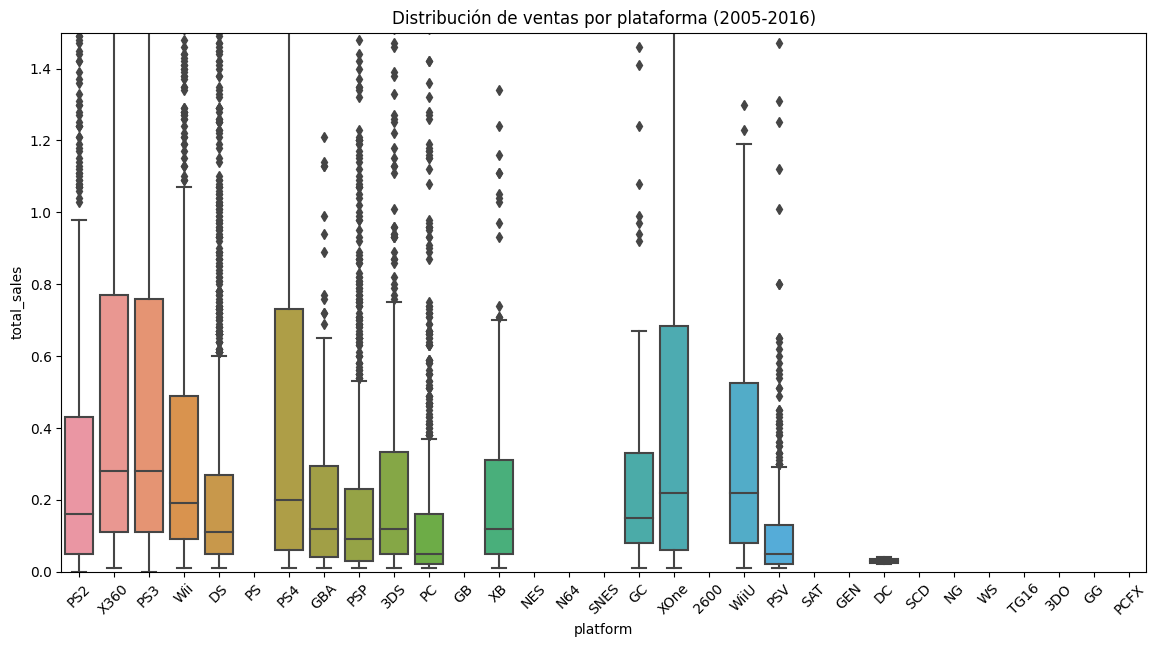

In [14]:
# DIAGRAMA DE CAJA POR PLATAFORMA

plt.figure(figsize=(14,7))
sns.boxplot(data=df_period, x='platform', y='total_sales', 
            order=sales_by_platform.index)
plt.ylim(0, 1.5)  # Excluir outliers extremos
plt.title('Distribución de ventas por plataforma (2005-2016)')
plt.xticks(rotation=45)
plt.show()



Observaciones:
- Wii tiene una mediana baja pero muchos outliers altos (juegos exitosos)
 - PS3/X360 tienen distribuciones similares, con medianas moderadas
- PS4/XOne (aunque con menos datos) muestran mayor mediana
- PC tiene amplia distribución con muchos outliers
- Portátiles (DS, 3DS, PSP) tienen ventas generalmente más bajas

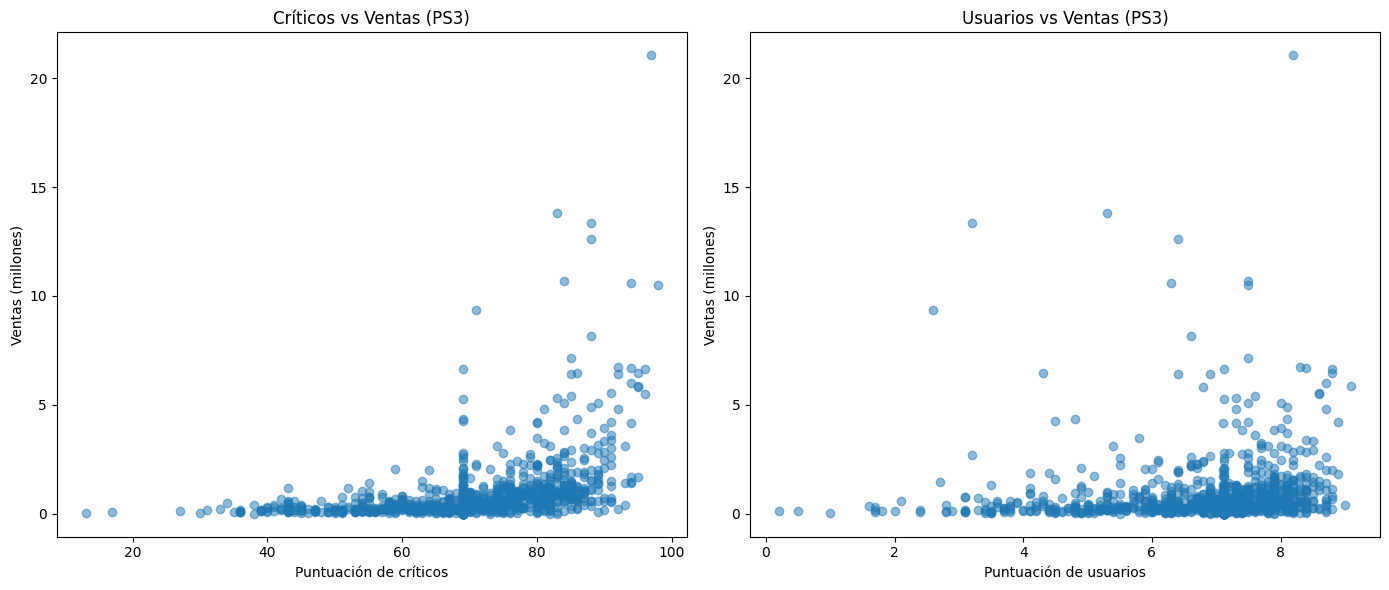

Correlación críticos-ventas: 0.42
Correlación usuarios-ventas: 0.08


In [18]:
# Analizamos PS3 por ser la plataforma central del período
ps3_data = df_period[df_period['platform'] == 'PS3'].dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Limpieza de User_Score
ps3_data['user_score'] = pd.to_numeric(ps3_data['user_score'], errors='coerce')
ps3_data = ps3_data.dropna(subset=['user_score'])

# Gráficos de dispersión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.scatter(ps3_data['critic_score'], ps3_data['total_sales'], alpha=0.5)
ax1.set_title('Críticos vs Ventas (PS3)')
ax1.set_xlabel('Puntuación de críticos')
ax1.set_ylabel('Ventas (millones)')

ax2.scatter(ps3_data['user_score'], ps3_data['total_sales'], alpha=0.5)
ax2.set_title('Usuarios vs Ventas (PS3)')
ax2.set_xlabel('Puntuación de usuarios')
ax2.set_ylabel('Ventas (millones)')

plt.tight_layout()
plt.show()

# Correlaciones
corr_critic = ps3_data['critic_score'].corr(ps3_data['total_sales'])
corr_user = ps3_data['user_score'].corr(ps3_data['total_sales'])
print(f"Correlación críticos-ventas: {corr_critic:.2f}")
print(f"Correlación usuarios-ventas: {corr_user:.2f}")



Observaciones:
- La correlación de 0.42 entre las puntuaciones de los críticos y las ventas indica una correlación positiva moderada. Esto significa que, en general, a medida que las puntuaciones de los críticos aumentan, las ventas tienden a aumentar también. Los críticos parecen tener una influencia notable en las ventas.
- La correlación de 0.08 entre las puntuaciones de los usuarios y las ventas es una correlación positiva muy débil, casi insignificante. Esto sugiere que las opiniones de los usuarios, tal como se reflejan en sus puntuaciones, tienen muy poca o casi ninguna relación lineal con las ventas. En otras palabras, que a un producto le gusten mucho a los usuarios no garantiza que se venda bien, y viceversa.


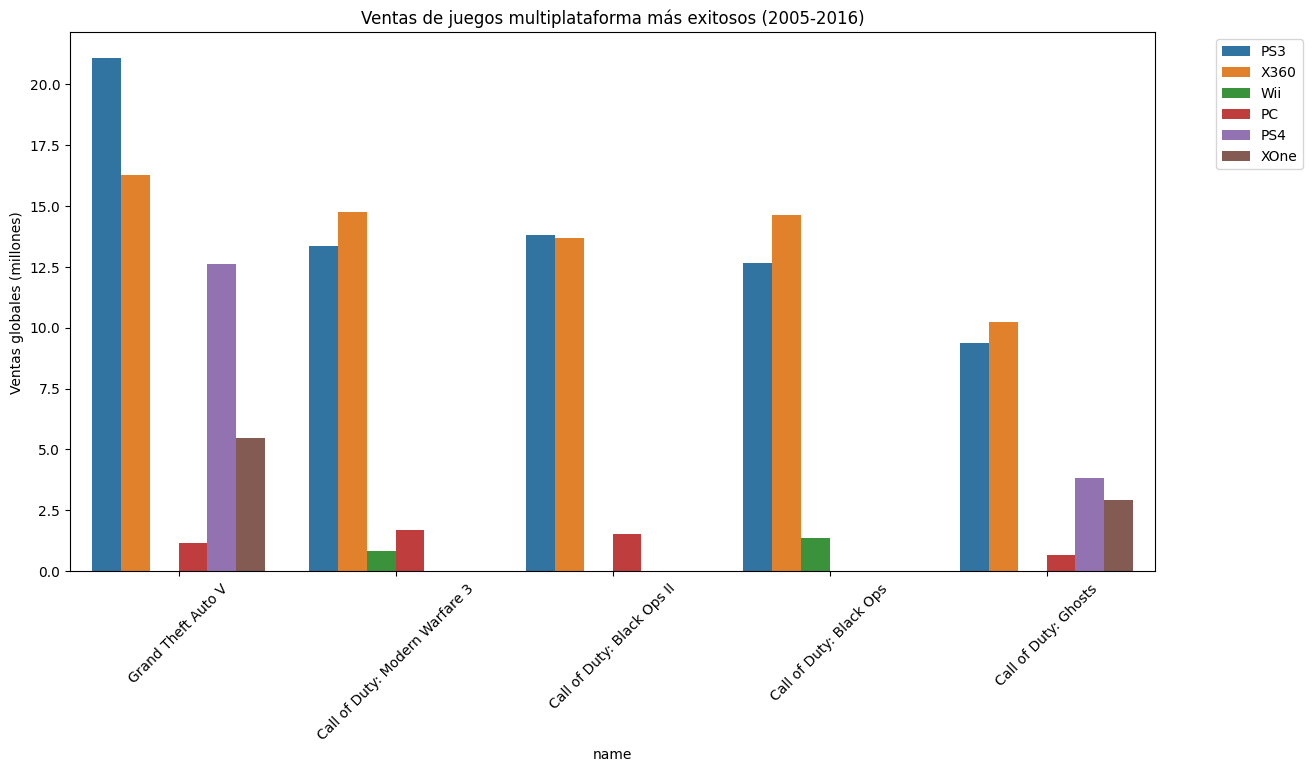

In [20]:
# COMPARACIÓN DE LAS VENTAS A NIVEL MULTIPLATAFORMA
multi_games = df_period[df_period.duplicated(subset=['name'], keep=False)]

# Top 5 juegos multiplataforma más vendidos
top_multi = multi_games.groupby('name')['total_sales'].sum().nlargest(5).index

# Filtrar y analizar
multi_analysis = multi_games[multi_games['name'].isin(top_multi)]

plt.figure(figsize=(14,7))
sns.barplot(data=multi_analysis, x='name', y='total_sales', hue='platform', 
            order=top_multi, hue_order=['PS3', 'X360', 'Wii', 'PC', 'PS4', 'XOne'])
plt.title('Ventas de juegos multiplataforma más exitosos (2005-2016)')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



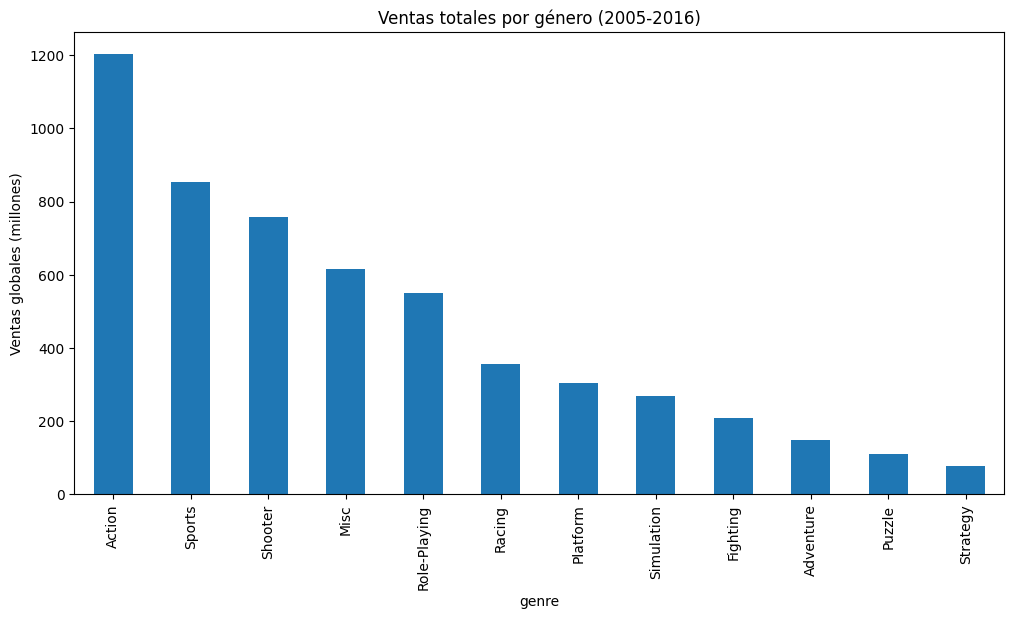

<Figure size 1400x700 with 0 Axes>

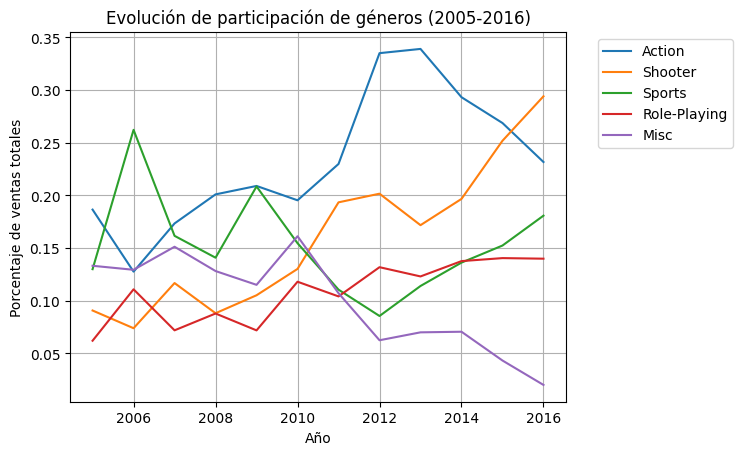

Crecimiento de géneros 2005-2016:
genre
Shooter        -0.079480
Role-Playing   -0.359408
Adventure      -0.548463
Sports         -0.605144
Action         -0.647383
Fighting       -0.772519
Strategy       -0.785985
Platform       -0.861492
Racing         -0.950205
Misc           -0.957356
Simulation     -0.961405
Puzzle         -0.999509
dtype: float64


In [21]:
# Ventas por género
genre_sales = df_period.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
genre_sales.plot(kind='bar')
plt.title('Ventas totales por género (2005-2016)')
plt.ylabel('Ventas globales (millones)')
plt.show()

# Evolución de géneros
genre_evolution = df_period.groupby(['year_of_release', 'genre'])['total_sales'].sum().unstack()

# Normalizar para ver tendencias
genre_evolution_pct = genre_evolution.div(genre_evolution.sum(axis=1), axis=0)

plt.figure(figsize=(14,7))
genre_evolution_pct[['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']].plot()
plt.title('Evolución de participación de géneros (2005-2016)')
plt.ylabel('Porcentaje de ventas totales')
plt.xlabel('Año')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Géneros con mayor crecimiento
genre_growth = (genre_evolution.loc[2016] - genre_evolution.loc[2005]) / genre_evolution.loc[2005]
print("Crecimiento de géneros 2005-2016:")
print(genre_growth.sort_values(ascending=False))



Observaciones:
- El género del Shooter muestra la tasa de crecimiento más uniforme a través de los años.
- El género de Action es el que más ventas ha tenido, manteniendo un comportamiento estable a lo largo de los años. Sports se comporta de manera similar, aunque con una caída en el 2012. 
- Los géneros con mayor declive fueron el Misceláneo, los juegos de simulación, puzzle y el racing. 
- El género RPG mantiene participación constante.

- Los géneros más rentables son el shooter, acción, RPG, Aventura y Deportes.
- En algunos casos, donde se evidencia un comportamiento estable, se podrían generalizar los géneros con ventas altas y bajas. 

# Perfiles de Usuario para cada región

In [22]:
# --------- FUNCIÓN PARA ANÁLISIS REGIONAL ---------
def perfil_por_region(region):
    region_col = f'{region.lower()}_sales'

    print(f"=== Análisis para {region.upper()} ===")

    # Top 5 plataformas
    plataformas = df.groupby('platform')[region_col].sum().sort_values(ascending=False).head(5)
    print("\nTop 5 plataformas:")
    print(plataformas)

    # Top 5 géneros
    generos = df.groupby('genre')[region_col].sum().sort_values(ascending=False).head(5)
    print("\nTop 5 géneros:")
    print(generos)

    # Ventas por clasificación ESRB
    clasificaciones = df.groupby('rating')[region_col].sum().sort_values(ascending=False)
    print("\nVentas por clasificación ESRB:")
    print(clasificaciones)

    return plataformas, generos, clasificaciones

# Ejecutar análisis para cada región
na_plat, na_gen, na_rat = perfil_por_region('na')
eu_plat, eu_gen, eu_rat = perfil_por_region('eu')
jp_plat, jp_gen, jp_rat = perfil_por_region('jp')

=== Análisis para NA ===

Top 5 plataformas:
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

Top 5 géneros:
genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64

Ventas por clasificación ESRB:
rating
E       2500.08
T        747.60
M        742.89
E10+     345.50
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64
=== Análisis para EU ===

Top 5 plataformas:
platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64

Top 5 géneros:
genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64

Ventas por clasificación ESRB:
rating
E       1313.52
M        480.00
T        421.79
E10+     183.35
AO         0.61
K-A        0.27
EC         0.11
RP         0.03
Name: eu_sales, dtype: f

Observaciones:
Los resultados obtenidos reflejan un comportamiento interesante de la demografía del mercado de los videojuegos en este rango temporal. 

 *América del Norte (NA)*
- Plataformas Dominantes: La Xbox 360 lidera con una ventaja significativa, seguida de cerca por la PS2 y la Wii. Esto sugiere una fuerte base de usuarios en consolas de Microsoft, pero también una presencia robusta de consolas de Sony y Nintendo.
- Géneros Populares: Los juegos de Acción, Deportes y Shooter son los más vendidos. Esto indica una preferencia por juegos dinámicos, competitivos y de alta inmersión.
- Clasificación ESRB: La clasificación "E" (Everyone) domina las ventas, lo que sugiere un mercado amplio y familiar. Las clasificaciones "T" (Teen) y "M" (Mature) también tienen ventas considerables, lo que indica un público diverso que consume contenido para todas las edades.

  *Europa (EU)*
- Plataformas Dominantes: Las consolas de PlayStation (PS2 y PS3) son las líderes indiscutibles, lo que refleja una fuerte lealtad a la marca Sony en la región. La Xbox 360 y la Wii también tienen buena presencia, pero están por debajo de PlayStation.
- Géneros Populares: Al igual que en NA, los géneros de Acción, Deportes y Shooter son los más vendidos. Sin embargo, el género de Carreras se posiciona notablemente en el Top 5, lo que podría indicar una mayor afición por este tipo de juegos en Europa en comparación con NA.
- Clasificación ESRB: Similar a NA, la clasificación "E" (Everyone) es la más vendida. Las clasificaciones "M" (Mature) y "T" (Teen) también son importantes, con un ligero aumento en las ventas de juegos "M" en comparación con "T" si se compara con NA.

  *Japón (JP)*
- Plataformas Dominantes: Japón muestra un panorama de plataformas muy diferente. La DS (Nintendo DS) es la líder indiscutible, seguida por consolas clásicas como la PS1 (PS) y la SNES, y luego la PS2 y la 3DS. La ausencia de Xbox 360 en el Top 5 es muy notable, lo que subraya la preferencia por consolas portátiles y las marcas domésticas (Nintendo y Sony) en Japón.
- Géneros Populares: El género de Role-Playing (RPG) es, con diferencia, el más vendido. Esto es un fuerte indicador de la preferencia cultural japonesa por los juegos con narrativas profundas y desarrollo de personajes. Los géneros de Acción, Deportes y Plataformas también son populares, pero con ventas mucho menores que los RPG.
- Clasificación ESRB: La clasificación "E" (Everyone) es, por mucho, la más vendida, lo que podría reflejar un mercado con un enfoque más familiar y un menor énfasis en juegos clasificados para adolescentes o adultos en comparación con NA y EU. Las ventas de "T" y "M" son significativamente más bajas.

# Pruebas de Hipótesis

## Formulación de Hipótesis
 - **Hipótesis Nula (H₀)**: La media de las calificaciones de usuarios es igual para Xbox One y PC.
 - **Hipótesis alternativa (H₁):** La media de las calificaciones de usuarios es diferente para Xbox One y PC.

La formulación de las hipótesis siguió con el carácter estadístico del comportamiento de las medias, es decir, para determinar si hay o no hay diferencias en las calificaciones de los usuarios.

Se utilizará la **prueba t de Student** para la comparación de dos muestras independientes. Es apropiado cuando las muestras pueden tener tamaños diferentes pero distribución similar.

In [25]:
# Comparación de calificaciones promedio de Xbox One y PC
alpha = 0.05  # 5%
# Filtrar plataformas relevantes y eliminar nulos
xone_scores = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df[df['platform'] == 'PC']['user_score'].dropna()

# Prueba t para dos muestras independientes
t_stat1, p_val1 = st.ttest_ind(xone_scores, pc_scores, equal_var=False)

# Resultados
print(f"Hipótesis 1 - Xbox One vs PC")
print(f"T-statística: {t_stat1:.4f}, valor p: {p_val1:.4f}")

if p_val1 < alpha:
    print("Rechazamos la hipótesis nula: las medias son diferentes.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula: las medias pueden ser iguales.")


Hipótesis 1 - Xbox One vs PC
T-statística: -4.4772, valor p: 0.0000
Rechazamos la hipótesis nula: las medias son diferentes.


## Formulación de Hipótesis
 - **Hipótesis Nula (H₀)**: La media de calificaciones de usuarios es igual para juegos de Acción y Deportes.
 - **Hipótesis alternativa (H₁):** La media de calificaciones de usuarios es diferente para esos géneros.

La formulación de las hipótesis siguió con el carácter estadístico del comportamiento de las medias, es decir, para determinar si hay o no hay diferencias en las calificaciones de los usuarios.

Se utilizará la **prueba t de Student** para la comparación de dos muestras independientes. Es apropiado cuando las muestras pueden tener tamaños diferentes pero distribución similar.

In [27]:
# Comparaciones de usuarios para Acción y Deportes
# Filtrar géneros relevantes y eliminar nulos
accion_scores = df[df['genre'] == 'Action']['user_score'].dropna()
deportes_scores = df[df['genre'] == 'Sports']['user_score'].dropna()

# Prueba t
t_stat2, p_val2 = st.ttest_ind(accion_scores, deportes_scores, equal_var=False)

# Resultados
print(f"\nHipótesis 2 - Acción vs Deportes")
print(f"T-statística: {t_stat2:.4f}, valor p: {p_val2:.4f}")

if p_val2 < alpha:
    print("Rechazamos la hipótesis nula: las medias son diferentes.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula: las medias pueden ser iguales.")



Hipótesis 2 - Acción vs Deportes
T-statística: 1.5243, valor p: 0.1275
No hay evidencia suficiente para rechazar la hipótesis nula: las medias pueden ser iguales.


Observaciones: 
- Se observa que hay diferencias en las calificaciones promedio de las plataformas de Xbox One y PC.
- Se observa que las calificaciones promedio para los géneros de Acción y Deportes pueden ser iguales (no se rechaza la Hipótesis Nula).

Esto podría significar que los usuarios perciben la calidad o experiencia de juego de manera distinta entre plataformas, pero no necesariamente entre esos dos géneros populares. 

# Conclusiones Generales



**Conclusión General del Proyecto**

El análisis de las tendencias del mercado de videojuegos entre 2005 y 2016, junto con los perfiles de usuario regionales y las pruebas de hipótesis, revela un panorama complejo y diferenciado que requiere estrategias de marketing y desarrollo adaptadas.

**Aspectos Clave**

Los críticos ejercen una influencia moderada pero significativa en las ventas de videojuegos (correlación de 0.42), a diferencia de las calificaciones de los usuarios, cuya correlación con las ventas es casi insignificante (0.08). Esto sugiere que la percepción de la industria y la prensa especializada es un factor más determinante para el éxito comercial que la opinión popular directa.

En cuanto a la evolución de los géneros, observamos un declive generalizado en el "crecimiento" de todos los géneros entre 2005 y 2016. Sin embargo, los géneros Shooter y Role-Playing mostraron una mayor resiliencia, experimentando el menor descenso. En el extremo opuesto, géneros como Puzzle y Simulation sufrieron las mayores caídas, indicando un cambio en las preferencias del consumidor o una saturación del mercado.

Los perfiles de usuario por región destacan diferencias culturales profundas:
- Norteamérica (NA) y Europa (EU) comparten una afinidad por las consolas de sobremesa y géneros como Acción, Deportes y Shooter. No obstante, Europa muestra una mayor inclinación por PlayStation y el género de Carreras ocupa un lugar más prominente.
- Japón (JP) se distingue drásticamente por su preferencia por las consolas portátiles (DS, 3DS) y el fuerte dominio del género Role-Playing (RPG). La presencia de consolas clásicas como PS y SNES también sugiere una base de jugadores con cierta nostalgia o continuidad. En todas las regiones, los juegos clasificados como "E" (Everyone) son consistentemente los de mayor venta, lo que subraya la importancia de un mercado amplio y familiar.

Finalmente, las pruebas de hipótesis revelaron que las calificaciones promedio de los usuarios son significativamente diferentes para Xbox One y PC, mientras que no hay evidencia suficiente para afirmar una diferencia entre las calificaciones promedio de los géneros Acción y Deportes. Esto implica que los usuarios perciben la calidad o experiencia de juego de manera distinta entre plataformas, pero no necesariamente entre esos dos géneros populares. 

**Recomendaciones estratégicas**
1. *Priorizar la Relación con Críticos e Influencers de gaming:* Dada su correlación con las ventas, es crucial invertir en relaciones públicas y campañas dirigidas a críticos especializados y medios influyentes. Las demostraciones exclusivas, el envío temprano de copias para revisión y una comunicación fluida pueden traducirse directamente en un mayor impacto comercial.
   
2. *Estrategias de Género Adaptadas:*
- Para géneros en declive (como Puzzle, Simulation o Racing en algunas regiones), considerar innovaciones disruptivas o modelos de negocio alternativos (juegos como servicio, free-to-play con microtransacciones) para revitalizar el interés.
- Continuar el soporte y la innovación en Shooters y RPGs, especialmente en Japón para este último, dada su relativa resiliencia y fuerte aceptación.

3. *Localización Profunda y Regionalización de Marketing:*
- Para el mercado japonés, la estrategia debe enfocarse en plataformas portátiles y en la creación o adaptación de RPGs de alta calidad que resuenen con su cultura de juego. Las campañas de marketing deben reflejar esta preferencia.
- Para NA y EU, continuar el desarrollo y marketing en consolas de sobremesa, con énfasis en Acción, Deportes y Shooter. Considerar promociones específicas para juegos de Carreras en Europa.

4. *Considerar la Experiencia por Plataforma:* La diferencia en las calificaciones de usuario entre Xbox One y PC sugiere que la optimización y el rendimiento en cada plataforma son factores críticos. Es esencial asegurar una experiencia de usuario pulida y consistente en cada plataforma para maximizar la satisfacción del jugador. Invertir en control de calidad específico por plataforma podría ser clave.

5. *Potencial del Mercado "E":* Dada la universalidad del éxito de los juegos clasificados "E", explorar oportunidades para desarrollar títulos accesibles y atractivos para todas las edades podría asegurar una base de consumidores más amplia y estable en todas las regiones.
